In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import glob
import visualizing as vi

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
df_path = glob.glob('./pre_data/*.csv')
df_path

['./pre_data\\경향_도쿄.csv',
 './pre_data\\도쿄(네이버).csv',
 './pre_data\\도쿄(다음).csv',
 './pre_data\\리우(네이버).csv',
 './pre_data\\서울신문_리우.csv',
 './pre_data\\서을신문_도쿄.csv']

In [4]:
df_list = []
for path in df_path:
    df = pd.read_csv(path)
    df = df.dropna()
    df = df.reset_index(drop=True)
    df_list.append(df)
data = pd.concat(df_list)

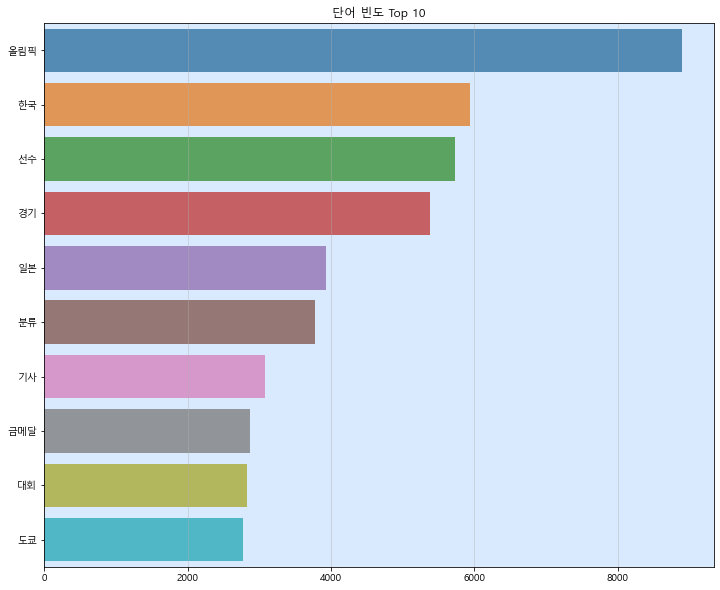

In [5]:
vi.word_count_bar(data)

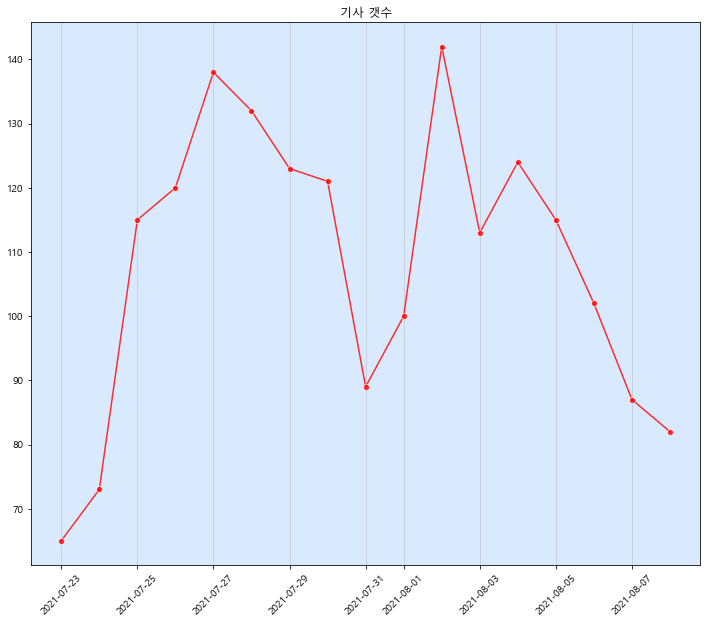

In [6]:
vi.date_line_plot(data, 'tokyo')

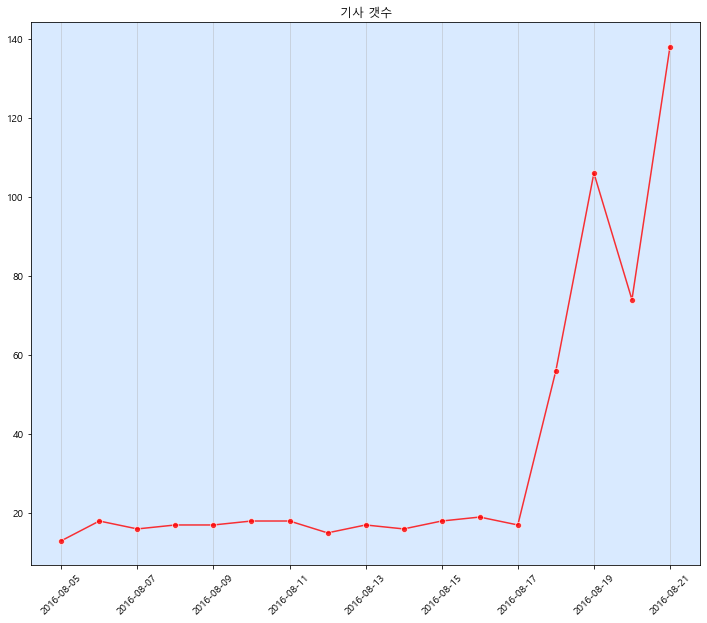

In [7]:
vi.date_line_plot(data, 'rio')

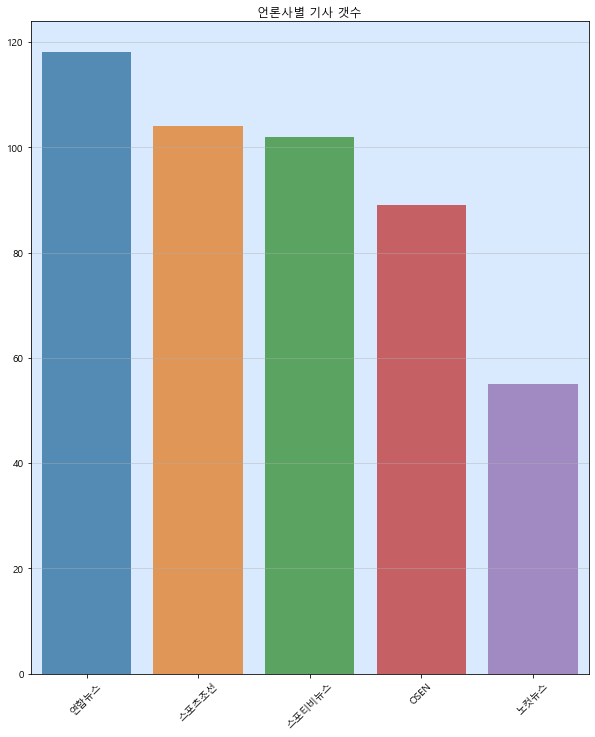

In [8]:
vi.press_bar_plot(data)